## Problem Statement

Prediction of bankruptcy is a phenomenon of increasing interest to firms who
stand to loose money because on unpaid debts. Since computers can store huge dataset
pertaining to bankruptcy making accurate predictions from them before hand is becoming
important. 

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

 In this project you will use various classification algorithms on bankruptcy
dataset to predict bankruptcies with satisfying accuracies long before the actual event.

# **Attribute Information**

Updated column names and description to make the data easier to understand (Y = Output feature, X = Input features)

Y - Bankrupt?: Class label 1 : Yes , 0: No 

X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)

X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)

X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)

X4 - Operating Gross Margin: Gross Profit/Net Sales

X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales

X6 - Operating Profit Rate: Operating Income/Net Sales

X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales

X8 - After-tax net Interest Rate: Net Income/Net Sales

X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio

X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales

X11 - Operating Expense Rate: Operating Expenses/Net Sales

X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales

X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities

X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity

X15 - Tax rate (A): Effective Tax Rate

X16 - Net Value Per Share (B): Book Value Per Share(B)

X17 - Net Value Per Share (A): Book Value Per Share(A)

X18 - Net Value Per Share (C): Book Value Per Share(C)

X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income

X20 - Cash Flow Per Share

X21 - Revenue Per Share (Yuan ¥): Sales Per Share

X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share

X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share

X24 - Realized Sales Gross Profit Growth Rate

X25 - Operating Profit Growth Rate: Operating Income Growth

X26 - After-tax Net Profit Growth Rate: Net Income Growth

X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth

X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth

X29 - Total Asset Growth Rate: Total Asset Growth

X30 - Net Value Growth Rate: Total Equity Growth

X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth

X32 - Cash Reinvestment %: Cash Reinvestment Ratio

X33 - Current Ratio

X34 - Quick Ratio: Acid Test

X35 - Interest Expense Ratio: Interest Expenses/Total Revenue

X36 - Total debt/Total net worth: Total Liability/Equity Ratio

X37 - Debt ratio %: Liability/Total Assets

X38 - Net worth/Assets: Equity/Total Assets

X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets

X40 - Borrowing dependency: Cost of Interest-bearing Debt

X41 - Contingent liabilities/Net worth: Contingent Liability/Equity

X42 - Operating profit/Paid-in capital: Operating Income/Capital

X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital

X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity

X45 - Total Asset Turnover

X46 - Accounts Receivable Turnover

X47 - Average Collection Days: Days Receivable Outstanding

X48 - Inventory Turnover Rate (times)

X49 - Fixed Assets Turnover Frequency

X50 - Net Worth Turnover Rate (times): Equity Turnover

X51 - Revenue per person: Sales Per Employee

X52 - Operating profit per person: Operation Income Per Employee

X53 - Allocation rate per person: Fixed Assets Per Employee

X54 - Working Capital to Total Assets

X55 - Quick Assets/Total Assets

X56 - Current Assets/Total Assets

X57 - Cash/Total Assets

X58 - Quick Assets/Current Liability

X59 - Cash/Current Liability

X60 - Current Liability to Assets

X61 - Operating Funds to Liability

X62 - Inventory/Working Capital

X63 - Inventory/Current Liability

X64 - Current Liabilities/Liability

X65 - Working Capital/Equity

X66 - Current Liabilities/Equity

X67 - Long-term Liability to Current Assets

X68 - Retained Earnings to Total Assets

X69 - Total income/Total expense

X70 - Total expense/Assets

X71 - Current Asset Turnover Rate: Current Assets to Sales

X72 - Quick Asset Turnover Rate: Quick Assets to Sales

X73 - Working capitcal Turnover Rate: Working Capital to Sales

X74 - Cash Turnover Rate: Cash to Sales

X75 - Cash Flow to Sales

X76 - Fixed Assets to Assets

X77 - Current Liability to Liability

X78 - Current Liability to Equity

X79 - Equity to Long-term Liability

X80 - Cash Flow to Total Assets

X81 - Cash Flow to Liability

X82 - CFO to Assets

X83 - Cash Flow to Equity

X84 - Current Liability to Current Assets

X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise

X86 - Net Income to Total Assets

X87 - Total assets to GNP price

X88 - No-credit Interval

X89 - Gross Profit to Sales

X90 - Net Income to Stockholder's Equity

X91 - Liability to Equity

X92 - Degree of Financial Leverage (DFL)

X93 - Interest Coverage Ratio (Interest expense to EBIT)

X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise

X95 - Equity to Liability

## Importing the libraries

In [566]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score, accuracy_score,precision_score, classification_report, roc_auc_score, roc_curve,f1_score
from imblearn.over_sampling import SMOTE,ADASYN,BorderlineSMOTE,KMeansSMOTE,SMOTENC
from scipy import stats

# Data Preparation

Importing Dataset and examining the properties of the dataset

In [478]:
# reading the csv file from pandas library
bank_data=pd.read_csv('COMPANY BANKRUPTCY PREDICTION.csv') 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [479]:
# Print the first 5 rows of the dataframe
bank_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [480]:
bank_data.tail()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,1.510213e-04,4.500000e+09,0.463734,1.790179e-04,0.113372,0.175045,0.175045,0.175045,0.216602,0.320966,0.020766,0.098200,0.172102,0.022374,0.848205,0.689778,0.689778,0.217635,7.070000e+09,0.000450,0.264517,0.380155,0.010451,0.005457,0.631415,0.006655,0.124618,0.875382,0.005150,0.373823,0.005366,0.098222,0.171111,0.404804,0.103448,0.000690,0.009177,4.030000e+07,0.000143,0.027903,0.006348,0.392596,0.006312,0.817769,0.312840,0.578455,0.099481,0.005469,0.005072,0.103838,0.346224,0.277543,0.013212,0.786888,0.736716,0.330914,1.792237e-03,0.925611,0.002266,0.019060,0.000229,0.000124,0.593985,1.077940e-04,0.671570,0.400338,0.786888,0.330914,0.112622,0.639806,0.458639,0.587178,0.314063,0.027951,0,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,5.220000e+09,1.440000e+09,0.461978,2.370237e-04,0.371596,0.181324,0.181324,0.181324,0.216697,0.318278,0.023050,0.098608,0.172780,0.022159,0.848245,0.689734,0.689734,0.217631,5.220000e+09,0.000445,0.264730,0.377389,0.009259,0.006741,0.631489,0.004623,0.099253,0.900747,0.006772,0.372505,0.008619,0.098572,0.171805,0.399926,0.103448,0.000655,0.009652,9.940000e+0

In [481]:
target_counts=bank_data["Bankrupt?"].value_counts()
target_counts

0    6599
1     220
Name: Bankrupt?, dtype: int64

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

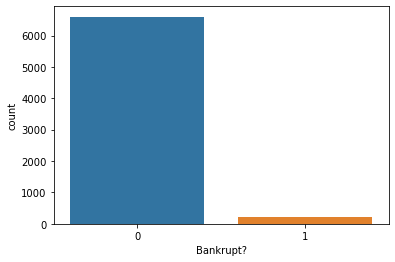

In [482]:
sns.countplot(bank_data['Bankrupt?'])

- Its highly imbalanced Dataset with ratio of **3 : 97**

In [483]:
bank_data.info() # to know the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

There are around 96 columns in the dataset with **93 of them being float** and ***3 being int***.

In [484]:
bank_data.shape # printing the shape of the dataframe

(6819, 96)

Data set has 96 columns and 6819 rows

In [485]:
bank_data.describe()# to know the statistical summary of the dataframe

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

## Checking for categorical Variables

In [486]:

for i in  bank_data.describe().columns:
    # print(len(bank_data[i].unique()) )
    if len(bank_data[i].unique()) < 10:
        print(i,'with',len(bank_data[i].unique()),'values')


Bankrupt? with 2 values
 Liability-Assets Flag with 2 values
 Net Income Flag with 1 values


 - Liability-Assets Flag has only two values: 1 and 0
 - Net Income Flag has only one value: 1
 - Bankrupt? is a target variable

In [487]:
print(bank_data[' Net Income Flag'].unique())
# Drop the columns Net Income Flag which is not required
bank_data.drop([' Net Income Flag'],axis=1,inplace=True)

[1]


Net Income Flag has only one unique value which is 1 in it

## Checking for Missing values 

In [488]:
pd.DataFrame(data=bank_data.isna().mean()*100,index=bank_data.columns).T

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [489]:
bank_data.isna().sum().sum()

0

We can see that there are no missing values in the dataset

There is no missing data

### Identifying numerical columns

In [490]:
numerical_columns=[x for x in bank_data.columns if x not in [' Net Income Flag','Bankrupt?'] ]
numerical_columns

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' Continuous Net 

In [491]:
from IPython.display import display
def display_quatile_dist(data,features):
    a=pd.DataFrame()
    r=[0,.01,.1,.25,.5,.75,.9,.99,1]
    for i in features :
#     display(bank_data[i].quantile(r))
        a[i]=data[i].quantile(r)
    
    display(a.style.bar())
    
display_quatile_dist(bank_data,numerical_columns)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.01,0.337876,0.352479,0.371831,0.580794,0.581259,0.997582,0.795218,0.807315,0.302198,0.779568,0.000102,0.000000,0.437551,0.000000,0.000000,0.140514,0.140028,0.140028,0.163861,0.281974,0.001470,0.066636,0.122775,0.021671,0.846386,0.678493,0.678509,0.216612,0.000102,0.000324,0.261876,0.321131,0.002390,0.000408,0.624236,0.000493,0.014149,0.761333,0.004911,0.369637,0.005366,0.067003,0.127517,0.393922,0.008996,0.000335,0.000410,0.000102,0.000104,0.010352,0.002279,0.357285,0.000226,0.684405,0.040822,0.085777,

- By this above table we can visualize how the value of features fluctuate
- And we can also check where we can expect outliers
- Magnitude of feature like 
    1. **Research and development expense rate** 
    2. **Interest-bearing debt interest rate**
    3. **Operating Expense Rate**
    4. **Total Asset Growth Rate**
    5. **Inventory Turnover Rate (times)**
    6. **Turnover Frequency**
    7. **Cash Turn Over Rate** 

are high compared to other features

## Feature Elimination :  from correlation  (Pearson correlation)
 - Eliminating features have correlation between more than .85  

<AxesSubplot:>

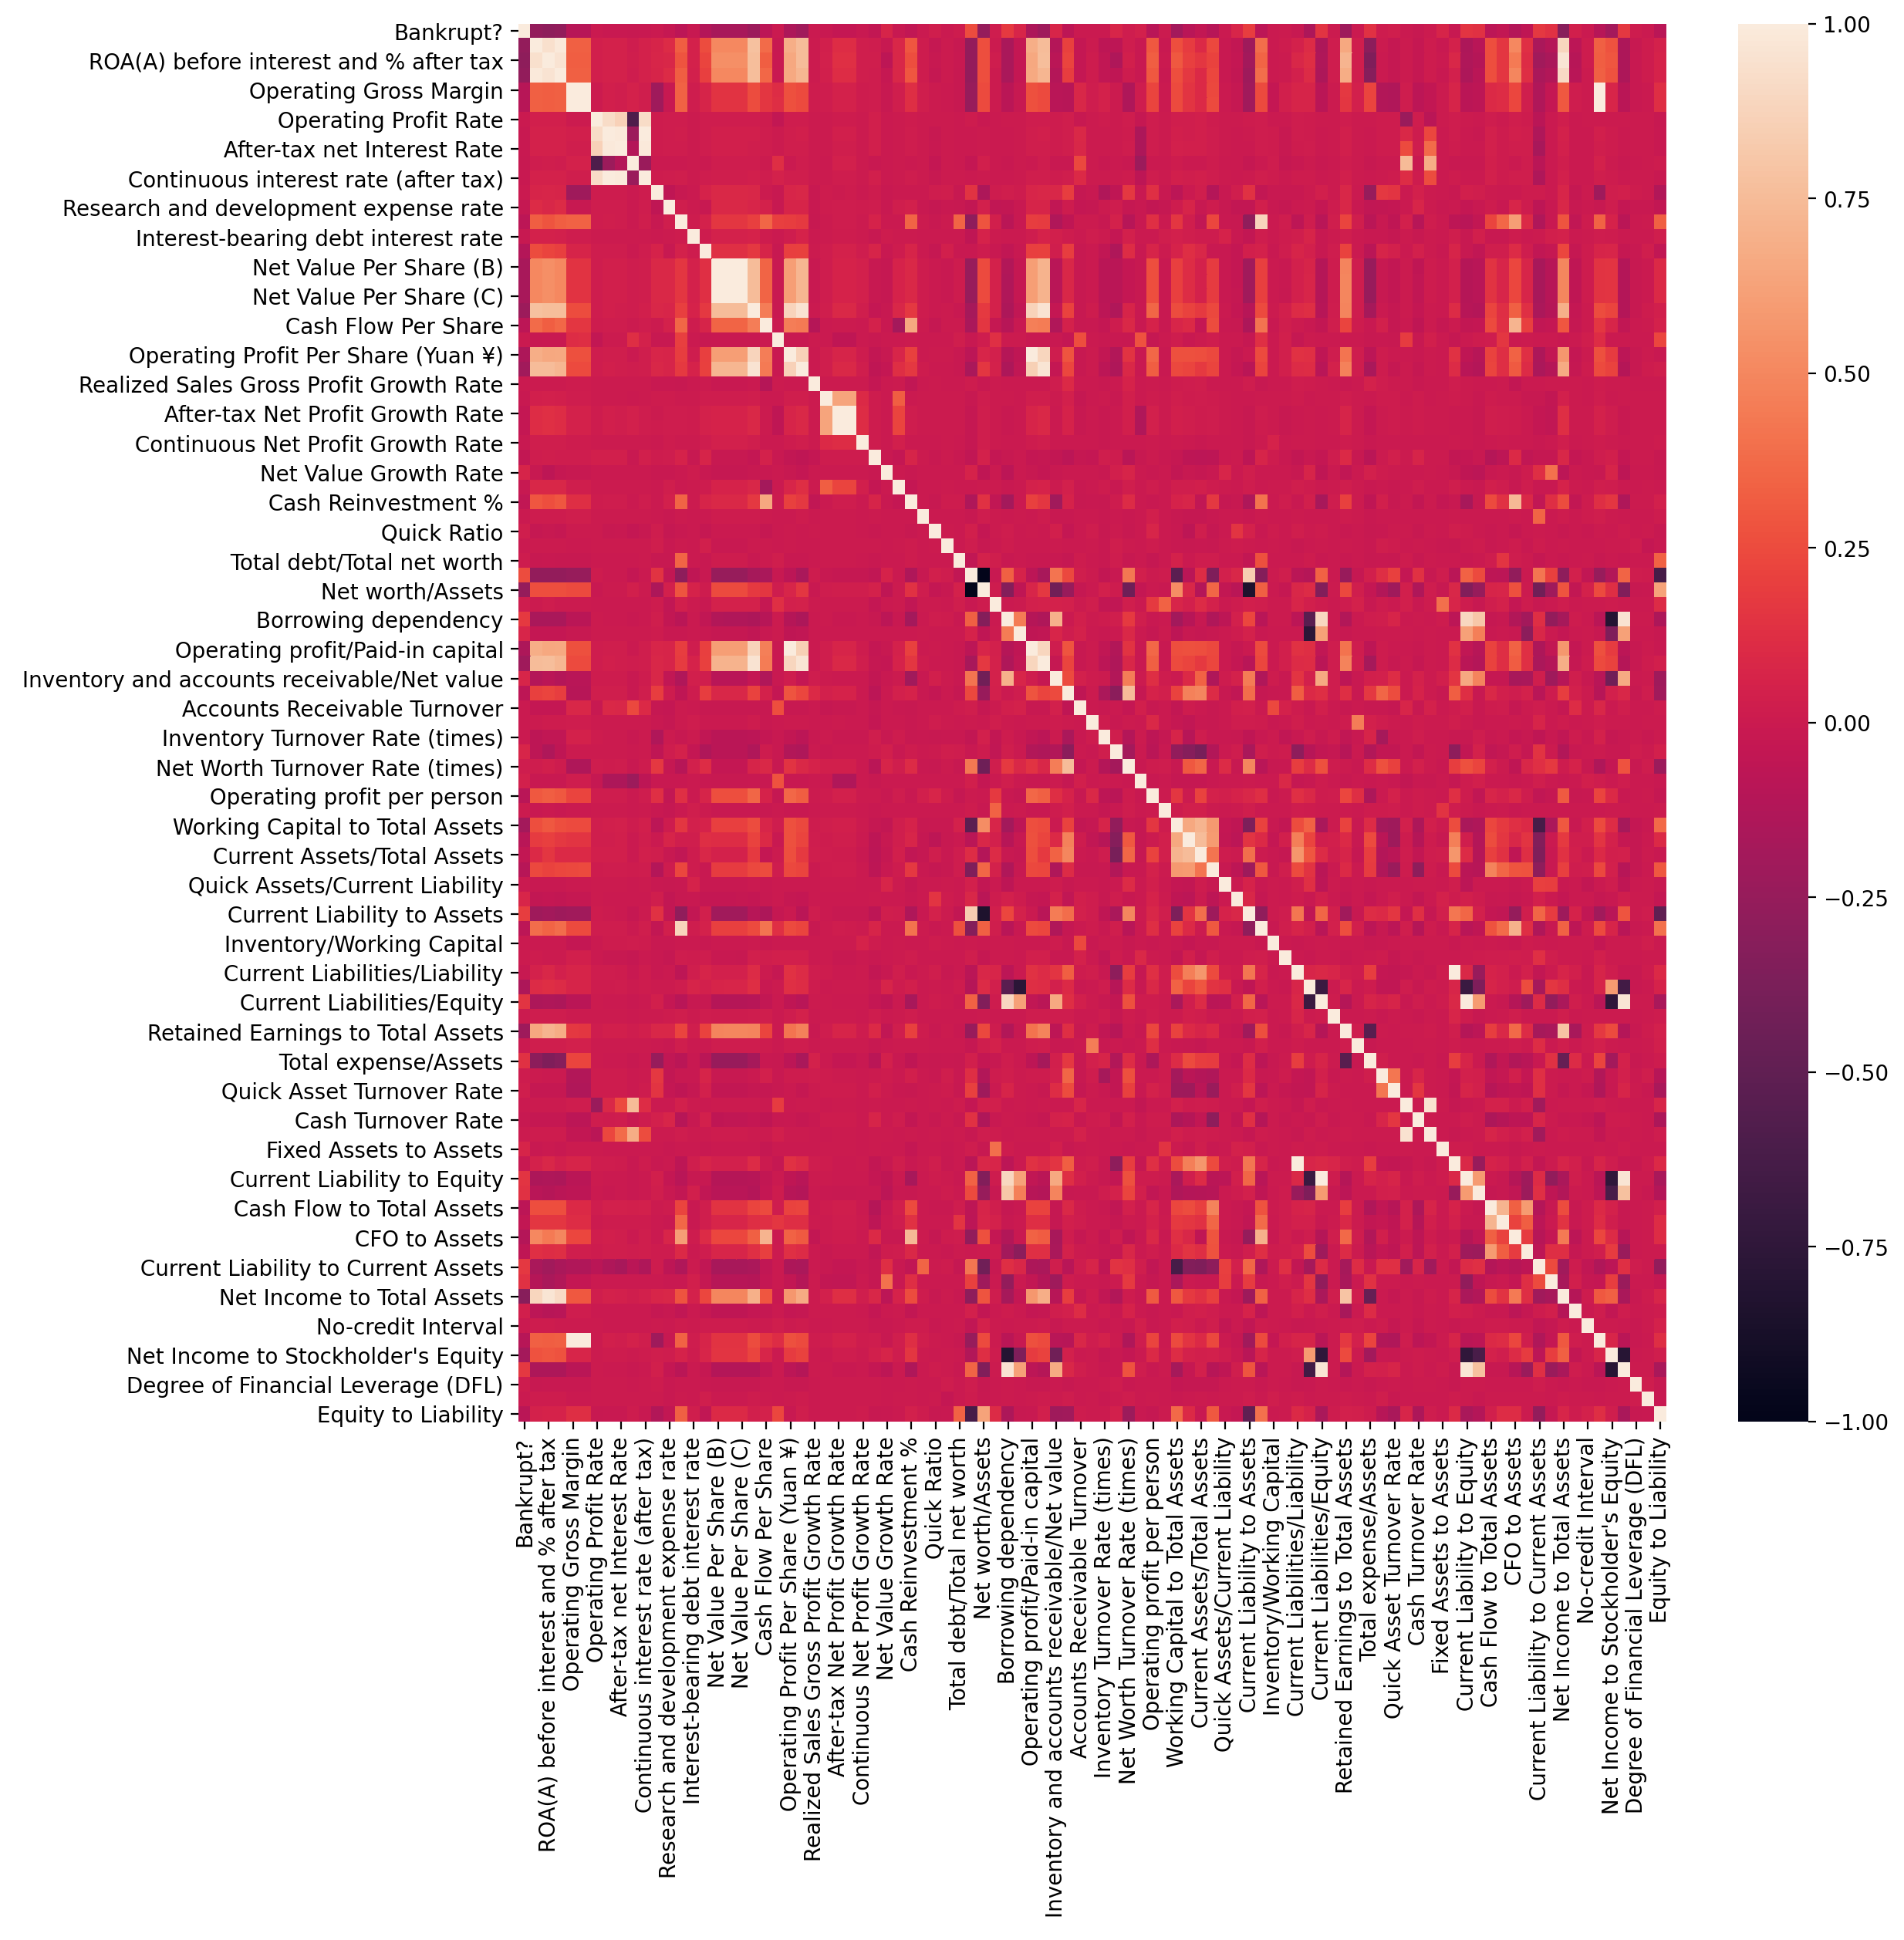

In [18]:
plt.figure(figsize=(12,12),dpi=200)
sns.heatmap(bank_data.corr(),)

### We are not able to compare how the features are correlated to each other
 - We cant do feature elimination one by one manually as there are so many features and its not the best practice
 - Hence we need some other feature elimination technique to get better insights i.e We need to automate the process

## Pearson correlation

In [492]:

# Import those libraries
import pandas as pd
from scipy.stats import pearsonr

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset


In [493]:
bank_data_stage_1=bank_data.copy()
correlation(bank_data_stage_1,.85)

<AxesSubplot:>

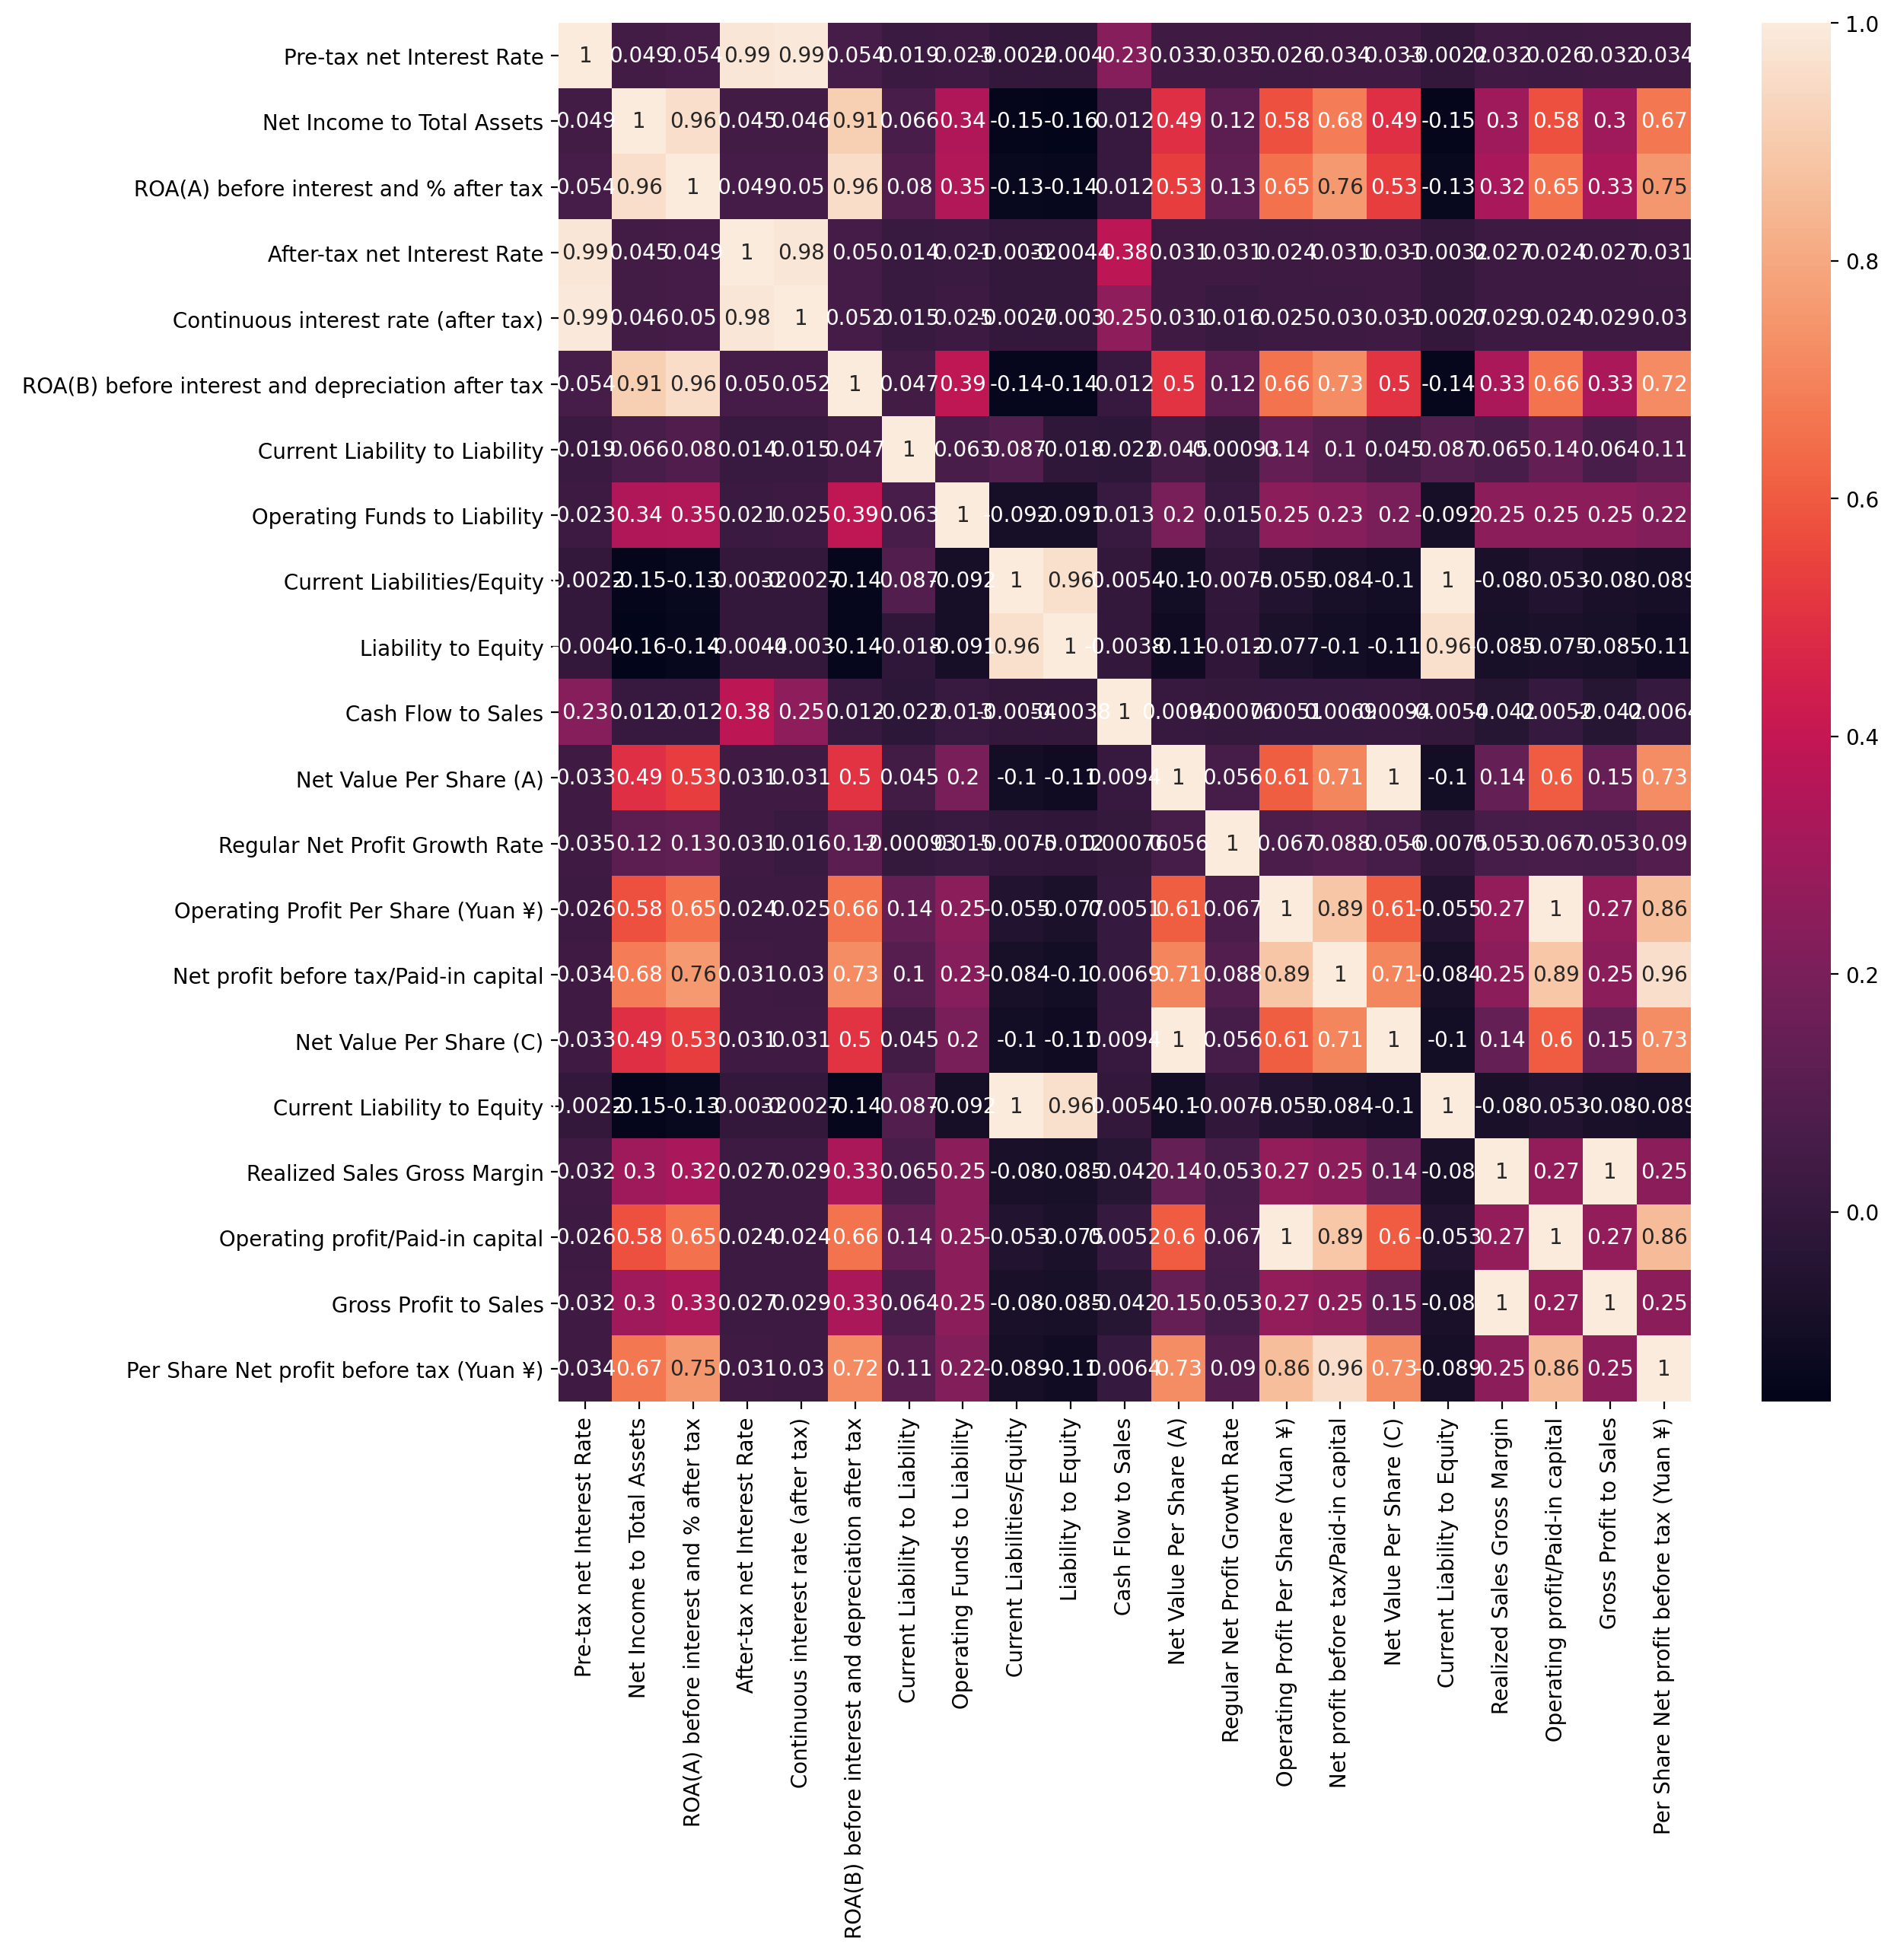

In [494]:
high_corr_cols=set(bank_data.columns)-set(bank_data_stage_1.columns)
plt.figure(figsize=(12,12),dpi=200)
sns.heatmap(bank_data[high_corr_cols].corr(),annot=True)

- Above map is the heatmap of high correlated features that are removed from data set 

In [495]:
bank_data_stage_1

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.169141,0.311664,0.017560,0.022102,0.848195,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.276920,0.001036,0.676269,0.721275,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.424206,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.208944,0.318137,0.021144,0.022080,0.848088,0.689693,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.289642,0.005210,0.308589,0.731975,2.394682e-02,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.468828,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.180581,0.307102,0.005944,0.022760,0.848094,0.689463,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,0.379093,0.006562,0.406580,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.013387,0.028997,0.381968,0.141016,0.829502,0.340201,0.602806,0.000991,0.006302,5.340000e+09,0.098162,0.277456,0.013879,0.446027,0.742729,3.715116e-03,0.909903,0.002060,0.021387,1.791094e-03,1.022676e-03,0.594502,7.610000e+08,0.276179,0.1

- Features is been reduced from 95 to 72 by removed high correlated features that are above .85

In [496]:
display_quatile_dist(np.log(bank_data_stage_1+1),bank_data_stage_1.columns)

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.01,0.000000,0.291084,0.457927,0.691937,0.264053,0.000102,0.000000,0.362941,0.000000,0.000000,0.131479,0.151743,0.248401,0.001469,0.021440,0.613230,0.517897,0.196070,0.000102,0.000324,0.232600,0.278488,0.002387,0.000408,0.485038,0.000493,0.014050,0.566071,0.004899,0.314546,0.005352,0.332121,0.008955,0.000335,0.000410,0.000102,0.000104,0.010298,0.002276,0.305486,0.000226,0.521413,0.040010,0.082296,0.002644,0.000549,0.000173,0.011636,0.241579,0.000000,0.187027,0.544182,0.000000,0.617336,0.001834,0.004284,0.000102,0.000102,0.466117,0.000103,0.003744,0.105200,0.421053,0.332184,0.357089,0.258652,0.003782,0.000000,0.000174,0.479598,0.602181,0.025007,0.441627,0.013706
0.1,0.000000,0.366269,0.467822,0.692579,0.264923,0.000121,0.000000,0.376980,0.000000,0.000000,0.150664,0.183235,0.271243,0.009241,0.021777,0.614042,0.524073,0.196831,0.000185,0.000413,0.233769,0.311169,0.005734,0.002621,0.488684,0.001617,0.043112,0.596672,0.005059,0.314546,0.005352,0.333400,0.046861,0.000544,0.002642,0.000123,0.000145,0.016635,0.006503,0.327296,0.001568,0.558600,0.134711,0.213804,0.014475,0.003135,0.000793,0.033876,0.244491,0.001048,0.378792,0.549146,0.000000,0.650419,0.002075,0.009148,0.000119,0.000116,0.466191,0.000141,0.032995,0.105200,0.476090,0.371725,0.425301,0.269579,0.010705,0.000000,0.000479,0.484245,0.608594,0.0

In [497]:
display_quatile_dist(bank_data_stage_1,bank_data_stage_1.columns)

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.01,0.000000,0.337876,0.580794,0.997582,0.302198,0.000102,0.000000,0.437551,0.000000,0.000000,0.140514,0.163861,0.281974,0.001470,0.021671,0.846386,0.678493,0.216612,0.000102,0.000324,0.261876,0.321131,0.002390,0.000408,0.624236,0.000493,0.014149,0.761333,0.004911,0.369637,0.005366,0.393922,0.008996,0.000335,0.000410,0.000102,0.000104,0.010352,0.002279,0.357285,0.000226,0.684405,0.040822,0.085777,0.002648,0.000549,0.000173,0.011704,0.273258,0.000000,0.205660,0.723198,0.000000,0.853982,0.001835,0.004293,0.000102,0.000102,0.593794,0.000103,0.003751,0.110933,0.523566,0.394009,0.429163,0.295183,0.003790,0.000000,0.000174,0.615426,0.826098,0.025322,0.555236,0.013800
0.1,0.000000,0.442344,0.596513,0.998865,0.303331,0.000121,0.000000,0.457875,0.000000,0.000000,0.162606,0.201097,0.311594,0.009284,0.022016,0.847886,0.688892,0.217539,0.000185,0.000413,0.263353,0.365020,0.005750,0.002625,0.630170,0.001619,0.044055,0.816066,0.005071,0.369637,0.005366,0.395706,0.047976,0.000544,0.002646,0.000123,0.000145,0.016774,0.006524,0.387212,0.001569,0.748224,0.144206,0.238380,0.014580,0.003140,0.000793,0.034457,0.276971,0.001048,0.460519,0.731773,0.000000,0.916344,0.002077,0.009190,0.000119,0.000116,0.593912,0.000141,0.033545,0.110933,0.609768,0.450234,0.530051,0.309412,0.010763,0.000000,0.000479,0.622950,0.837845,0.0

In [509]:
features=[x for x in bank_data_stage_1.columns if x not in ["Bankrupt?"]]


In [630]:
def skeeness_Range(data,features,range1,range2):
    cols_in_range=[]
    for col in features:
        if range2 > data[col].skew() >= range1 :
#             print(data[col].skew(),col)
            cols_in_range.append(col)
#     sns.histplot(bank_data_stage_1[col])
#     plt.show()
    return cols_in_range



In [538]:
def graph_label_title(x_label=False,y_label=False,title=False):
    if x_label:
        plt.xlabel(x_label)
    if y_label:
        plt.ylabel(x_label)
    if title:
        plt.title(title)
        

## Checking skewness of all the features in the form of distribution


In [530]:
skew_table=bank_data_stage_1.skew().sort_values()
print( "\033[1m" + 'Top 5 features that skewed negatively' + "\033[0m")
display(pd.DataFrame(skew_table.head()))
print( "\033[1m" + 'Top 5 features that skewed positively' + "\033[0m")
display(pd.DataFrame(skew_table.tail()))

Top 5 features that skewed negatively


,0
Operating Profit Growth Rate,-71.688950
Operating Profit Rate,-70.237164
Net Income to Stockholder's Equity,-37.964701
Working Capital/Equity,-36.203654
Working capitcal Turnover Rate,-28.584611


Top 5 features that skewed positively


,0
Contingent liabilities/Net worth,79.670620
Net Value Growth Rate,80.291844
Total income/Total expense,82.332424
Current Ratio,82.577237
Fixed Assets to Assets,82.577237


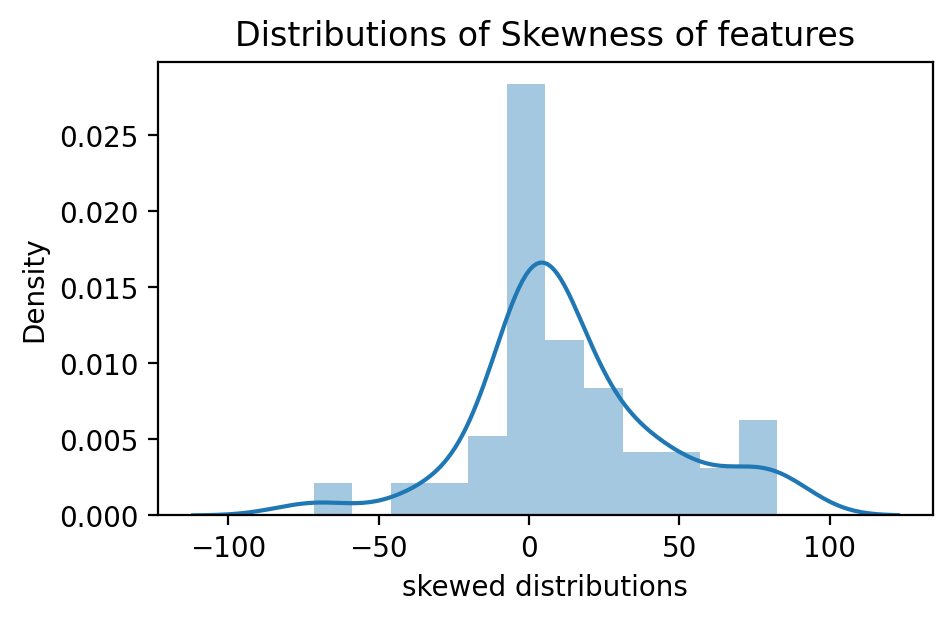

In [546]:
plt.figure(figsize=(5,3),dpi=200)
sns.distplot(skew_table)
graph_label_title('skewed distributions',False,'Distributions of Skewness of features')

- We can see that most of the features are skewed towards 0
- There are features that are skewed towards both right side and left side

### Lets check some highly right skewed features


In [746]:
def print_skewness_and_handle_outlier(skewness_range_1,skewness_range_2,data,skewness,percentile=.99,inplace=False):    
    skew_cols=skeeness_Range(bank_data_stage_1,features,skewness_range_1,skewness_range_2)
    print("*"*4+f'Displaying first 5 rows of features that are having it skewness from {skewness_range_1} to {skewness_range_2}'+"*"*4)
    display(bank_data_stage_1[skew_cols].head())

    print("*"*4+f' Displaying percentile of columns that are skewed from {skewness_range_1} to {skewness_range_2} '+"*"*4)
    display_quatile_dist(data,skew_cols)
    
#     tips = sns.load_dataset("tips")
    print("*"*4+' Box plot before removal of outliers'+"*"*4)
    plt.figure(figsize=(15,3))
    ax = sns.boxplot(data=data[skew_cols], orient="h", palette="Set2")
    data[skew_cols].hist(bins=50)
    plt.show()
    
    outlier_indices=return_and_print_outliers_(data,skew_cols,percentile,skewness)
    data1=data.drop(outlier_indices)
    data.drop(outlier_indices,inplace=inplace)
    

    display_quatile_dist(data1,skew_cols)
    print("*"*4+' Box plot after removal of outliers'+"*"*4)
    plt.figure(figsize=(15,3))
    plt.figure(figsize=(15,3))
    ax = sns.boxplot(data=data1[skew_cols], orient="h", palette="Set2")
    data1[skew_cols].hist(bins=50)
#     data1[skew_cols].boxplot()
#     plt.xticks(rotation=90)
    plt.show()


def return_and_print_outliers_(data,cols,percentile,skewness):
    print(f'\n\n {"*"*10}Outliers beyond {percentile} percentile {"*"*10}')
    outliers_indcies=set()
    a=pd.DataFrame()
    for i in cols:
        if skewness=="+":
            outlier=data[data[i]> percentile]
        elif skewness=='-': 
            outlier=data[data[i] < percentile]
        outliers_indcies.update(outlier.index)
        a=pd.concat([a,outlier])
    display(a)
    print(f'{a.shape[0]} columns are removed ')
    return outliers_indcies




****Displaying first 5 rows of features that are having it skewness from 70 to 85****


,Realized Sales Gross Profit Growth Rate,Net Value Growth Rate,Current Ratio,Contingent liabilities/Net worth,Total income/Total expense,Fixed Assets to Assets
0,0.022102,0.000327,0.002259,0.006479,0.002022,0.424206
1,0.022080,0.000443,0.006016,0.005835,0.002226,0.468828
2,0.022760,0.000396,0.011543,0.006562,0.002060,0.276179
3,0.022046,0.000382,0.004194,0.005366,0.001831,0.559144
4,0.022096,0.000439,0.006022,0.006624,0.002224,0.309555


**** Displaying percentile of columns that are skewed from 70 to 85 ****


,Realized Sales Gross Profit Growth Rate,Net Value Growth Rate,Current Ratio,Contingent liabilities/Net worth,Total income/Total expense,Fixed Assets to Assets
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.01,0.021671,0.000324,0.002390,0.005366,0.001835,0.003751
0.1,0.022016,0.000413,0.005750,0.005366,0.002077,0.033545
0.25,0.022065,0.000441,0.007555,0.005366,0.002236,0.085360
0.5,0.022102,0.000462,0.010587,0.005366,0.002336,0.196881
0.75,0.022153,0.000499,0.016270,0.005764,0.002492,0.372200
0.9,0.022266,0.000583,0.027156,0.006660,0.002708,0.558893
0.99,0.024486,0.001199,0.074595,0.010043,0.003721,0.790928
1.0,1.000000,9330000000.000000,2750000000.000000,1.000000,1.000000,8320000000.000000


**** Box plot before removal of outliers****


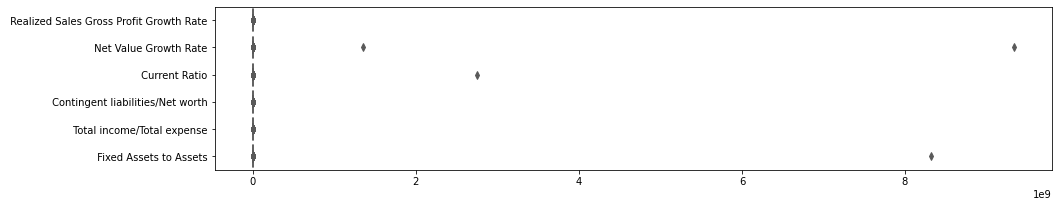



 **********Outliers beyond 0.9 percentile **********


,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
1424,0,0.469995,0.608823,0.998961,0.303528,2.524345e-04,0.000000,0.450479,1.140114e-04,0.204575,0.168387,0.214617,0.169449,1.237806e-01,1.000000,0.848268,0.689314,0.217686,8.352443e-04,1.380951e-03,0.264368,0.293674,9.978128e-03,0.006127,0.630760,1.252063e-02,0.171297,0.828703,0.008448,0.370372,0.005366,0.422531,0.919040,2.418512e-03,2.615523e-03,2.898578e-04,1.625562e-02,0.222258,4.161685e-02,0.391940,6.628333e-04,0.854299,0.636028,0.957474,0.016670,6.405237e-03,4.932002e-04,0.179265,0.277435,9.576602e-03,1.000000,0.742056,0.000000,0.932336,0.002231,0.141619,6.500000e+09,4.390000e+09,0.593936,3.590000e+07,3.223926e-02,0.110933,0.604551,0.453542,0.383712,0.306101,0.029249,0,0.000422,0.623745,0.840163,0.026829,0.565331,0.020779
2470,1,0.404036,0.586611,0.998568,0.302249,2.890912e-04,0.000000,0.457979,3.640364e-04,0.000000,0.116599,0.173301,0.311417,1.836139e-02,0.021732,0.843895,0.684855,0.217416,4.120000e+09,9.330000e+09,0.260341,0.365169,1.260526e-03,0.000763,0.630462,7.693942e-02,0.338483,0.661517,0.004877,0.295894,0.004445,0.390738,0.098951,3.132704e-03,2.018641e-03,1.910000e+07,8.550000e+09,0.139677,1.735529e-02,0.369225,2.384235e-02,0.643091,0.129527,0.124091,0.015737,1.399524e-03,5.210096e-04,0.160152,0.276975,0.000000e+00,0.449042,0.764645,0.123090,0.843977,0.001928,0.126337,3.130000e+09,3.890000e+09,0.593819,1.450000e+09,6.520321e-01,0.000000,0.617235,0.457308,0.514097,0.332253,0.193950,1,0.008659,0.623173,0.916329,0.026745,0.564930,0.008500
2735,0,0.436894,0.585062,0.998495,0.303434,3.374273e-04,0.000000,0.459881,9.800000e+08,0.000000,0.121613,0.188617,0.311594,1.028480e-02,0.022216,0.848101,0.689567,0.217613,5.860000e+08,1.350000e+09,0.265399,0.319493,0.000000e+00,0.000165,0.630437,1.945349e-01,0.312755,0.687245,0.004700,0.187124,0.005366,0.390443,0.055472,2.342426e-02,2.698352e-04,7.908513e-04,3.180000e+08,0.676613,6.239443e-03,0.382239,2.410301e-02,0.475181,0.035045,0.044384,0.031474,7.540000e+09,5.159688e-04,0.323917,0.276969,1.647657e-04,0

19 columns are removed 


,Realized Sales Gross Profit Growth Rate,Net Value Growth Rate,Current Ratio,Contingent liabilities/Net worth,Total income/Total expense,Fixed Assets to Assets
0.0,0.000000,0.000000,0.000163,0.000000,0.000772,0.000000
0.01,0.021679,0.000326,0.002471,0.005366,0.001837,0.003918
0.1,0.022016,0.000413,0.005771,0.005366,0.002079,0.033582
0.25,0.022065,0.000441,0.007565,0.005366,0.002236,0.085271
0.5,0.022102,0.000462,0.010598,0.005366,0.002336,0.196588
0.75,0.022153,0.000499,0.016269,0.005764,0.002492,0.370672
0.9,0.022267,0.000582,0.027070,0.006660,0.002708,0.555686
0.99,0.024480,0.001146,0.073873,0.009963,0.003703,0.778641
1.0,0.101643,0.138678,0.712630,0.073164,0.021153,0.899223


**** Box plot after removal of outliers****


<Figure size 1080x216 with 0 Axes>

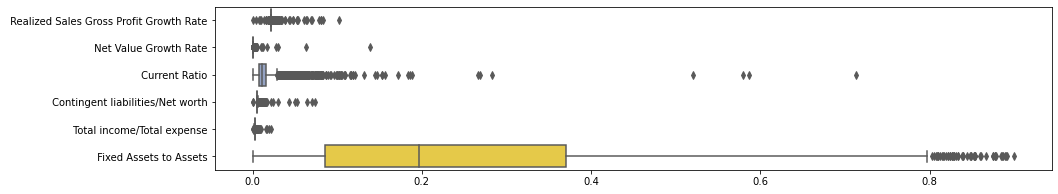

In [732]:
print_skewness_and_handle_outlier(70,85,bank_data_stage_1,'+',.90,True)

****Displaying first 5 rows of features that are having it skewness from 60 to 70****


,Continuous Net Profit Growth Rate,Working capitcal Turnover Rate
0,0.217535,0.593831
1,0.217620,0.593916
2,0.217601,0.594502
3,0.217568,0.593889
4,0.217626,0.593915


**** Displaying percentile of columns that are skewed from 60 to 70 ****


,Continuous Net Profit Growth Rate,Working capitcal Turnover Rate
0.0,0.000000,0.572892
0.01,0.216644,0.593798
0.1,0.217539,0.593912
0.25,0.217580,0.593935
0.5,0.217598,0.593963
0.75,0.217622,0.594002
0.9,0.217663,0.594067
0.99,0.218562,0.594516
1.0,1.000000,1.000000


**** Box plot before removal of outliers****


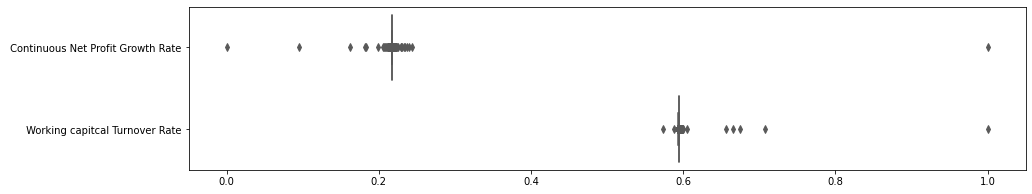

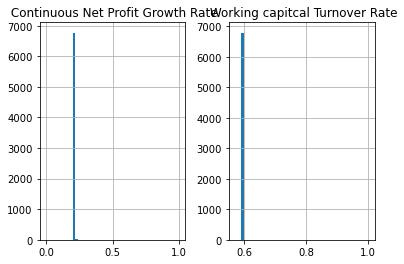



 **********Outliers beyond 0.8 percentile **********


,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
5924,0,0.518403,0.608289,0.999097,0.303905,0.000108,2.870000e+09,0.468150,0.000000,0.188784,0.285702,0.244304,0.324397,0.025712,0.022281,0.849879,0.703297,1.000000,6.720000e+09,0.000474,0.264583,0.379885,0.016243,0.014378,0.630616,0.001459,0.040572,0.959428,0.009009,0.369637,0.005366,0.395782,0.058471,0.000948,0.006680,1.570620e-04,0.00051,0.016452,0.013724,0.398171,0.003406,0.800061,0.258300,0.283723,0.054441,0.014317,0.008599,0.033192,0.277075,0.005325,0.727407,0.734296,0.000000,0.940561,0.002658,0.010869,0.000198,0.000185,0.594006,0.000103,0.056963,0.110933,0.635254,0.454796,0.585547,0.313733,0.018060,0,0.002444,0.625742,0.841510,0.026792,0.565163,0.093982
5015,0,0.446887,0.609774,0.000000,1.000000,1.000000,1.000000e+00,0.450378,0.000269,0.000000,0.172011,0.211591,0.315131,0.000000,0.022092,0.847489,0.687067,0.217409,1.204415e-04,0.000550,0.263729,0.372415,0.014952,0.005301,0.630386,0.001707,0.046407,0.953593,0.005022,0.371111,0.005366,0.393766,0.000000,0.000386,0.016404,3.820000e+07,0.00000,0.008871,0.000000,0.383856,0.088671,0.773734,0.136049,0.136778,0.055439,0.014406,0.016322,0.017586,0.277013,0.001763,0.336805,0.733056,0.024565,0.928744,0.002048,0.006697,1.000000,1.000000,1.000000,1.000000,0.883962,0.114850,0.666485,0.471441,0.546185,0.317182,0.019614,0,0.002133,0.624062,0.839646,0.026791,0.565158,0.082685


2 columns are removed 


,Continuous Net Profit Growth Rate,Working capitcal Turnover Rate
0.0,0.000000,0.572892
0.01,0.216644,0.593798
0.1,0.217539,0.593912
0.25,0.217580,0.593935
0.5,0.217598,0.593963
0.75,0.217622,0.594002
0.9,0.217663,0.594067
0.99,0.218549,0.594515
1.0,0.243456,0.706978


**** Box plot after removal of outliers****


<Figure size 1080x216 with 0 Axes>

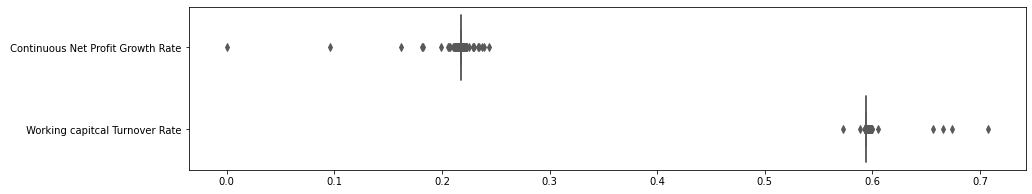

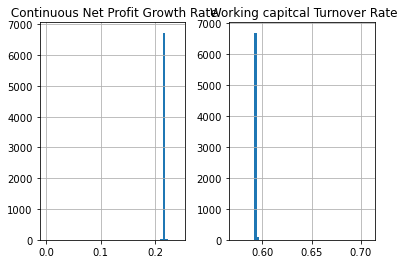

In [748]:
print_skewness_and_handle_outlier(60,70,bank_data_stage_1,'+',.8)

By 

In [754]:
bank_data_stage_1[[' Continuous Net Profit Growth Rate',' Working capitcal Turnover Rate']].var()

 Continuous Net Profit Growth Rate    0.000101
 Working capitcal Turnover Rate       0.000029
dtype: float64

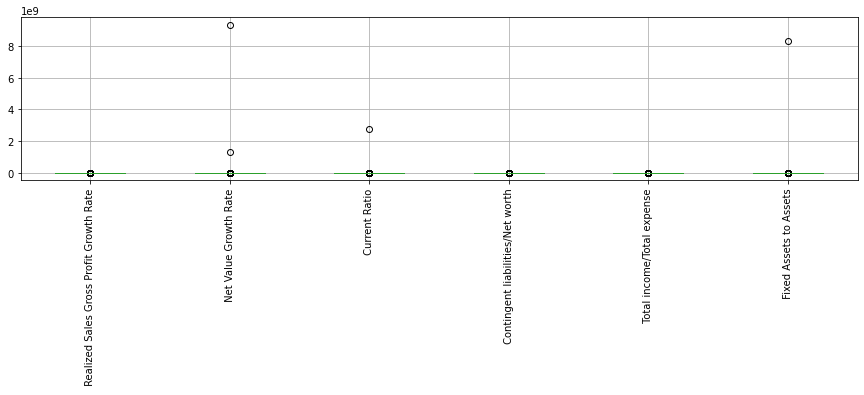

In [634]:
plt.figure(figsize=(15,3))
bank_data_stage_1[skew_70_to_85].boxplot()
plt.xticks(rotation=90)
plt.show()


- We can see that there are some outliers present

In [669]:

return_and_print_outliers_(bank_data_stage_1,skew_70_to_85)



 **********Outliers for  Realized Sales Gross Profit Growth Rate **********


,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
1424,0,0.469995,0.608823,0.998961,0.303528,0.000252,0.0,0.450479,0.000114,0.204575,0.168387,0.214617,0.169449,0.123781,1.0,0.848268,0.689314,0.217686,0.000835,0.001381,0.264368,0.293674,0.009978,0.006127,0.63076,0.012521,0.171297,0.828703,0.008448,0.370372,0.005366,0.422531,0.91904,0.002419,0.002616,0.00029,0.016256,0.222258,0.041617,0.39194,0.000663,0.854299,0.636028,0.957474,0.01667,0.006405,0.000493,0.179265,0.277435,0.009577,1.0,0.742056,0.0,0.932336,0.002231,0.141619,6.500000e+09,4.390000e+09,0.593936,35900000.0,0.032239,0.110933,0.604551,0.453542,0.383712,0.306101,0.029249,0,0.000422,0.623745,0.840163,0.026829,0.565331,0.020779




 **********Outliers for  Net Value Growth Rate **********


,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
2470,1,0.404036,0.586611,0.998568,0.302249,0.000289,0.000000,0.457979,3.640364e-04,0.0,0.116599,0.173301,0.311417,0.018361,0.021732,0.843895,0.684855,0.217416,4.120000e+09,9.330000e+09,0.260341,0.365169,0.001261,0.000763,0.630462,0.076939,0.338483,0.661517,0.004877,0.295894,0.004445,0.390738,0.098951,3.132704e-03,0.002019,1.910000e+07,8.550000e+09,0.139677,0.017355,0.369225,0.023842,0.643091,0.129527,0.124091,0.015737,1.399524e-03,0.000521,0.160152,0.276975,0.000000,0.449042,0.764645,0.123090,0.843977,0.001928,0.126337,3.130000e+09,3.890000e+09,0.593819,1.450000e+09,0.652032,0.000000,0.617235,0.457308,0.514097,0.332253,0.193950,1,0.008659,0.623173,0.916329,0.026745,0.564930,0.008500
2735,0,0.436894,0.585062,0.998495,0.303434,0.000337,0.000000,0.459881,9.800000e+08,0.0,0.121613,0.188617,0.311594,0.010285,0.022216,0.848101,0.689567,0.217613,5.860000e+08,1.350000e+09,0.265399,0.319493,0.000000,0.000165,0.630437,0.194535,0.312755,0.687245,0.004700,0.187124,0.005366,0.390443,0.055472,2.342426e-02,0.000270,7.908513e-04,3.180000e+08,0.676613,0.006239,0.382239,0.024103,0.475181,0.035045,0.044384,0.031474,7.540000e+09,0.000516,0.323917,0.276969,0.000165,0.999817,0.961070,0.000000,0.863099,0.001892,0.024552,2.270000e+09,2.160000e+09,0.593406,6.010000e+09,0.882981,0.110933,0.649341,0.459805,0.519647,0.302513,1.000000,1,0.000420,0.557613,0.885473,0.026744,0.564922,0.009546
4447,0,0.457368,0.597789,0.994709,0.308561,0.004331,0.001785,0.462067,2.270227e-04,0.0,0.168682,0.212820,0.323477,0.000212,0.022092,0.000000,0.000000,0.138308,1.000000e+00,1.000000e+00,0.000000,0.378646,0.007650,0.006178,0.626271,0.019031,0.200441,0.799559,0.005746,0.380252,0.005848,0.408025,0.001499,6.090000e+08,1.000000,3.250000e+07,4.540000e+08,0.009355,0.000306,0.387565,0.018937,0.780008,0.458199,0.493827,0.070529,6.916929e-03,0.003108,0.120187,0.277230,0.002248,0.568855,0.735661,0.018108,0.930707,0.002157,0.004011,3.074089e-02,2.866119e-02,0.598467,1.123508e-02,0.168345,0.136878,0.675490,0.4



 **********Outliers for  Current Ratio **********


,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
2490,0,0.412178,0.000000,0.988045,0.303526,0.001407,0.0,0.000000,0.000345,0.00000,0.199444,0.198733,0.314600,0.000257,0.021601,0.847191,0.683591,0.216859,8.580000e+09,0.000520,0.262968,0.372238,1.000000e+00,1.000000,0.630605,4.740000e+08,0.001512,0.998488,0.004716,0.369637,0.006179,0.393663,0.001499,0.049356,0.000128,19100000.0,0.000000,0.009032,0.009377,0.050915,0.00000,0.818355,0.253038,0.242417,0.000904,1.000000,0.010062,0.000000,0.276975,0.0,0.063817,0.734745,0.00000,0.931764,0.000000,0.002266,7.307076e-03,7.655675e-03,0.598915,6.880000e+09,0.000000,0.110933,0.616908,0.343844,0.544180,0.312115,0.000000,0,0.002466,0.626786,0.838652,0.026789,0.565148,0.743588
2499,0,0.571296,0.642824,0.999650,0.307626,0.000109,0.0,0.470606,0.000123,0.11489,0.219502,0.259809,0.324326,0.003585,0.022124,0.848059,0.689376,0.217589,7.130000e+09,0.000474,0.263661,0.372369,2.750000e+09,0.000147,0.630640,1.542053e-03,0.042567,0.957433,0.009056,0.371236,0.010482,0.393686,0.013493,0.015503,0.000408,19100000.0,0.000113,0.010645,0.049525,0.505597,0.05249,0.716045,0.000000,0.000000,0.001967,0.000167,0.000257,0.040262,0.276975,0.0,0.845468,0.730244,0.10223,0.967305,0.005955,0.002818,6.740000e+08,1.320000e+08,0.593646,1.590000e+09,0.057384,0.111720,0.623779,0.448574,0.599193,0.312472,0.916814,0,0.013680,0.632213,0.843386,0.026799,0.565194,0.089814




 **********Outliers for  Contingent liabilities/Net worth **********


,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
2440,1,0.393702,0.587354,0.998837,0.303528,3.120000e+09,0.0,0.461025,0.000862,0.0,0.126965,0.112319,0.315095,0.166039,0.021528,0.845983,0.685937,0.217171,5.440000e+09,0.000204,0.262208,0.374027,0.001086,0.000996,0.629914,1.0,0.29519,0.70481,0.004826,0.954819,1.0,0.454522,0.355322,0.009341,0.000677,19100000.0,0.000299,0.314677,0.093019,0.353802,0.037792,0.588815,0.169288,0.162182,0.07778,0.001226,0.001774,0.232695,0.276975,0.0,0.756927,0.0,0.04354,0.901883,0.001647,0.022958,351000000.0,981000000.0,0.59387,2.220000e+09,0.620196,0.862994,0.612159,0.456579,0.556863,0.0,0.218206,0,0.003198,0.625328,0.442176,0.02662,0.564182,0.010365




 **********Outliers for  Total income/Total expense **********


,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
6391,0,0.523765,0.657915,1.0,0.303537,0.0,0.0,0.494222,0.0,0.062759,0.205048,0.236929,0.330622,0.004235,0.022052,0.848008,0.689332,0.217586,726000000.0,0.000454,0.263604,0.384254,0.000604,0.000892,0.630613,0.000766,0.022765,0.977235,0.127015,0.369637,0.006517,0.393666,0.02099,0.065002,9.730000e+09,19100000.0,0.007688,0.01129,0.089787,0.702845,0.00236,0.729407,0.00631,0.006045,0.006352,0.000744,0.001223,0.027138,0.276975,0.0,0.993374,0.730965,0.0,0.948072,1.0,0.0,1.190000e+09,1.860000e+09,0.593805,3.410000e+09,0.002138,0.110933,0.637642,0.454168,0.648197,0.31403,0.334265,0,0.014654,0.64212,0.841886,0.026791,0.56516,0.15844




 **********Outliers for  Fixed Assets to Assets **********


,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
2344,1,0.459123,0.612851,0.998869,0.303296,4.085437e-04,0.0,0.457680,0.000414,0.0,0.182083,0.211024,0.288604,0.003796,0.022107,0.848017,0.689582,0.217604,7.080000e+09,0.000437,0.264084,0.319828,0.008113,0.000000,0.618091,0.025007,0.217432,0.782568,0.923930,0.395616,0.005366,0.441273,0.007496,0.450399,1.370000e+08,9.550000e+07,3.498575e-02,0.011774,0.012538,0.388119,3.480000e+09,0.820982,0.037696,0.988767,0.000891,0.000200,2.090000e+09,0.226224,0.278828,2.077711e-02,0.998928,0.742752,0.0,0.930454,0.002121,0.004320,5.572368e-03,0.000244,0.594907,1.300000e+09,8.320000e+09,0.110933,0.635904,0.458443,0.487126,0.312128,0.035799,0,0.002044,0.617460,0.839563,0.026473,0.562992,0.015541
2460,0,0.457710,0.615381,0.998788,0.303121,5.304246e-04,0.0,0.463139,0.001270,0.0,0.187266,0.211686,0.317677,0.000817,0.021992,0.848062,0.689668,0.217618,6.300000e+09,0.000443,0.264230,0.376318,0.003734,0.002220,0.629536,0.006931,0.127581,0.872419,0.004878,0.369657,0.005366,0.393686,0.002999,0.005050,1.252684e-03,1.910000e+07,1.510000e+07,0.009516,0.009109,0.386694,7.336964e-01,0.749193,0.001469,0.001407,0.000315,0.003873,4.175531e-04,0.003533,0.276975,0.000000e+00,0.013753,0.731820,0.0,0.930025,0.002184,0.005074,9.950000e+09,0.000110,0.593872,1.110000e+09,9.987249e-01,0.110933,0.641950,0.459080,0.565171,0.314406,0.074949,0,0.002403,0.623349,0.839929,0.026615,0.564150,0.029121
2496,1,0.473651,0.578165,0.998648,0.301557,7.370000e+08,0.0,0.458980,0.000465,0.0,0.137162,0.171315,0.314388,0.003312,0.022193,0.848106,0.689456,0.217599,6.120000e+09,0.000331,0.264111,0.375424,0.002554,0.002278,0.625583,0.121797,0.276869,0.723131,0.004984,0.514239,0.005366,0.393715,0.007496,0.062632,1.007613e-04,3.451830e-02,3.780000e+08,0.017742,0.020340,0.370729,6.213767e-01,0.741420,0.021722,0.020835,0.023749,0.002691,6.757579e-03,0.018212,0.276974,6.440000e+08,0.049582,0.726599,1.0,0.912139,0.001891,0.009499,1.280960e-04,0.000140,0.593798,3.165289e-04,1.000000e+00,0.480440,0.649390,0.459877,0.560380,0.3

{1424, 2344, 2440, 2460, 2470, 2490, 2496, 2499, 2735, 4447, 6391}

In [670]:
bank_data_stage_1.drop({1424, 2344, 2440, 2460, 2470, 2490, 2496, 2499, 2735, 4447, 6391})

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.169141,0.311664,0.017560,0.022102,0.848195,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.276920,0.001036,0.676269,0.721275,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.424206,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.208944,0.318137,0.021144,0.022080,0.848088,0.689693,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.289642,0.005210,0.308589,0.731975,2.394682e-02,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.468828,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.180581,0.307102,0.005944,0.022760,0.848094,0.689463,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,0.379093,0.006562,0.406580,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.013387,0.028997,0.381968,0.141016,0.829502,0.340201,0.602806,0.000991,0.006302,5.340000e+09,0.098162,0.277456,0.013879,0.446027,0.742729,3.715116e-03,0.909903,0.002060,0.021387,1.791094e-03,1.022676e-03,0.594502,7.610000e+08,0.276179,0.1

In [26]:
from sklearn.feature_selection import f_classif,SelectKBest 
fs = SelectKBest(score_func=f_classif,k=50)
# Apply feature selection
fs.fit(bank_data_stage_1.drop("Bankrupt?",axis=1),bank_data_stage_1['Bankrupt?'])

SelectKBest(k=50)

In [27]:
fs.get_support()

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True, False,  True, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
        True])

In [28]:
feat_score=pd.DataFrame(data={'score':fs.scores_,'p_value':np.round(fs.pvalues_,4)},index=[x for x in bank_data_stage_1.columns if x not in ['Bankrupt?']]).sort_values("score",ascending=False)
feat_score.reset_index()

,index,score,p_value
0,ROA(C) before interest and depreciation befor...,497.535121,0.0000
1,Net worth/Assets,455.091151,0.0000
2,Debt ratio %,455.091151,0.0000
3,Persistent EPS in the Last Four Seasons,345.267517,0.0000
4,Retained Earnings to Total Assets,339.411396,0.0000
5,Current Liability to Assets,268.012458,0.0000
6,Working Capital to Total Assets,263.987646,0.0000
7,Net Income to Stockholder's Equity,230.861805,0.0000
8,Borrowing dependency,219.303339,0.0000
9,Current Liability to Current Assets,206.098157,0.0000


- Ordering features which respect to the rank given from SelectKBest function

<AxesSubplot:xlabel=' ROA(C) before interest and depreciation before interest', ylabel=' Debt ratio %'>

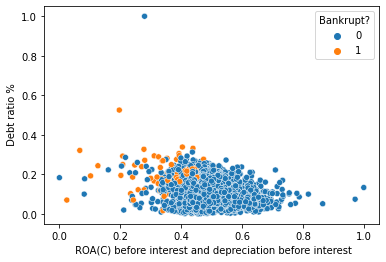

In [29]:
sns.scatterplot(data=bank_data_stage_1,x=' ROA(C) before interest and depreciation before interest',y=" Debt ratio %",hue="Bankrupt?")

<AxesSubplot:xlabel=' ROA(C) before interest and depreciation before interest', ylabel=' Debt ratio %'>

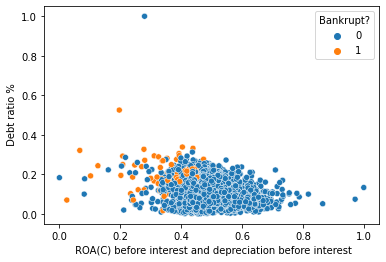

In [30]:
sns.scatterplot(data=bank_data_stage_1,x=' ROA(C) before interest and depreciation before interest',y=" Debt ratio %",hue="Bankrupt?")

In [31]:
bank_data_stage_1

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.169141,0.311664,0.017560,0.022102,0.848195,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.276920,0.001036,0.676269,0.721275,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.424206,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.208944,0.318137,0.021144,0.022080,0.848088,0.689693,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.289642,0.005210,0.308589,0.731975,2.394682e-02,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.468828,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.180581,0.307102,0.005944,0.022760,0.848094,0.689463,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,0.379093,0.006562,0.406580,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.013387,0.028997,0.381968,0.141016,0.829502,0.340201,0.602806,0.000991,0.006302,5.340000e+09,0.098162,0.277456,0.013879,0.446027,0.742729,3.715116e-03,0.909903,0.002060,0.021387,1.791094e-03,1.022676e-03,0.594502,7.610000e+08,0.276179,0.1

In [32]:
bank_data_stage_2=bank_data_stage_1.copy()

In [33]:
# Outliers removal

def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in bank_data_stage_2:
    new_df = outliers_removal(bank_data_stage_2[col],str(col),bank_data_stage_2)
    # print(col)




Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.476527080388047 | Quartile 75: 0.535562813825379
iqr: 0.05903573343733198
Cut Off: 0.08855360015599797
 ROA(C) before interest and depreciation before interest Lower: 0.38797348023204903
 ROA(C) before interest and depreciation before interest Upper: 0.624116413981377
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.6004446590466855 | Quartile 75: 0.613914152697502
iqr: 0.01346949365081651
Cut Off: 0.020204240476224766
 Operating Gross Margin Lower: 0.5802404185704608
 Operating Gross Margin Upper: 0.6341183931737269
 Operating Gross Margin outliers for close to bankruptcy cases: 320
-----------------------------------------

In [34]:
def log_trans(data):
    
    for col in data:
        skew = data[col].skew()
        if skew > 0.5 or skew < -0.5 and col!="Bankrupt?":
            data[col] = np.log1p(data[col])
        else:
            continue
            
    return data

data_norm = log_trans(new_df)

In [35]:
display_quatile_dist(new_df,feat_score.index)

,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Current Liability to Assets,Working Capital to Total Assets,Net Income to Stockholder's Equity,Borrowing dependency,Current Liability to Current Assets,Net Value Per Share (B),Working Capital/Equity,Liability-Assets Flag,Total expense/Assets,Equity to Long-term Liability,CFO to Assets,Tax rate (A),Cash/Total Assets,Operating Gross Margin,Operating profit per person,Quick Assets/Total Assets,Equity to Liability,Cash/Current Liability,Cash Flow Per Share,Inventory and accounts receivable/Net value,Fixed Assets Turnover Frequency,Cash flow rate,Cash Flow to Total Assets,Contingent liabilities/Net worth,Total Asset Turnover,Fixed Assets to Assets,Net Value Growth Rate,Cash Flow to Equity,Cash Reinvestment %,Current Assets/Total Assets,Total Asset Growth Rate,Cash Flow to Liability,Revenue per person,After-tax Net Profit Growth Rate,Total assets to GNP price,Quick Asset Turnover Rate,Quick Ratio,Research and development expense rate,Interest-bearing debt interest rate,Net Worth Turnover Rate (times),Current Liabilities/Liability,Cash Turnover Rate,Long-term fund suitability ratio (A),Total Asset Return Growth Rate Ratio,Non-industry income and expenditure/revenue,Operating Profit Growth Rate,Total debt/Total net worth,Current Asset Turnover Rate,Degree of Financial Leverage (DFL),Continuous Net Profit Growth Rate,Total income/Total expense,Average Collection Days,Operating Expense Rate,No-credit Interval,Interest Coverage Ratio (Interest expense to EBIT),Accounts Receivable Turnover,Revenue Per Share (Yuan ¥),Quick Assets/Current Liability,Working capitcal Turnover Rate,Allocation rate per person,Interest Expense Ratio,Current Ratio,Inventory/Working Capital,Inventory Turnover Rate (times),Inventory/Current Liability,Long-term Liability to Current Assets,Realized Sales Gross Profit Growth Rate,Operating Profit Rate
0.0,0.000000,0.000000,0.039189,0.000000,0.000000,0.000784,0.000000,0.000000,0.000000,0.000770,0.000000,0.000000,0.000000,0.000895,0.000000,0.000000,0.000000,0.000000,0.359528,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.344819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.278264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001433,0.000000,0.000000,0.000000,0.000772,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.01,0.337232,0.564718,0.041106,0.151568,0.619656,0.020921,0.681707,0.601984,0.314546,0.007876,0.131385,0.543941,0.000000,0.004380,0.105200,0.432618,0.000000,0.002627,0.457852,0.306341,0.040666,0.013530,0.000168,0.247997,0.332196,0.000104,0.368820,0.534874,0.005352,0.011923,0.004356,0.000320,0.259127,0.276899,0.087573,0.000102,0.354645,0.002545,0.517901,0.000180,0.000102,0.000399,0.000000,0.000000,0.010748,0.187156,0.000103,0.004896,0.232599,0.264195,0.613251,0.001516,0.000102,0.024931,0.196102,0.001833,0.000409,0.000102,0.479979,0.441113,0.000337,0.001970,0.000524,0.466112,0.000242,0.484913,0.002356,0.241406,0.000102,0.000000,0.000000,0.021388,0.692161
0.1,0.443914,0.595656,0.057050,0.183078,0.650581,0.043404,0.745416,0.608548,0.314546,0.014005,0.150486,0.549029,0.000000,0.009195,0.105200,0.530020,0.000000,0.013930,0.467758,0.327573,0.141821,0.018687,0.000736,0.271054,0.333657,0.000146,0.377140,0.611942,0.005352,0.049718,0.035348,0.000412,0.269703,0.310977,0.237791,0.000181,0.372761,0.006739,0.524075,0.000506,0.000115,0.002457,0.000000,0.000106,0.017745,0.373103,0.000141,0.005051,0.233788,0.264924,0.614045,0.002268,0.000118,0.026286,0.196832,0.002078,0.002688,0.000120,0.484213,0.447560,0.000542,0.010395,0.002993,0.466189,0.001738,0.488645,0.005549,0.244456,0.000123,0.001095,0.000000,0.021778,0.692585
0.25,0.476966

In [36]:
bank_data_stage_4=data_norm.copy()
# bank_data_stage_4=new_df.copy()

In [37]:
display_quatile_dist(bank_data_stage_4,feat_score.index)

,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Current Liability to Assets,Working Capital to Total Assets,Net Income to Stockholder's Equity,Borrowing dependency,Current Liability to Current Assets,Net Value Per Share (B),Working Capital/Equity,Liability-Assets Flag,Total expense/Assets,Equity to Long-term Liability,CFO to Assets,Tax rate (A),Cash/Total Assets,Operating Gross Margin,Operating profit per person,Quick Assets/Total Assets,Equity to Liability,Cash/Current Liability,Cash Flow Per Share,Inventory and accounts receivable/Net value,Fixed Assets Turnover Frequency,Cash flow rate,Cash Flow to Total Assets,Contingent liabilities/Net worth,Total Asset Turnover,Fixed Assets to Assets,Net Value Growth Rate,Cash Flow to Equity,Cash Reinvestment %,Current Assets/Total Assets,Total Asset Growth Rate,Cash Flow to Liability,Revenue per person,After-tax Net Profit Growth Rate,Total assets to GNP price,Quick Asset Turnover Rate,Quick Ratio,Research and development expense rate,Interest-bearing debt interest rate,Net Worth Turnover Rate (times),Current Liabilities/Liability,Cash Turnover Rate,Long-term fund suitability ratio (A),Total Asset Return Growth Rate Ratio,Non-industry income and expenditure/revenue,Operating Profit Growth Rate,Total debt/Total net worth,Current Asset Turnover Rate,Degree of Financial Leverage (DFL),Continuous Net Profit Growth Rate,Total income/Total expense,Average Collection Days,Operating Expense Rate,No-credit Interval,Interest Coverage Ratio (Interest expense to EBIT),Accounts Receivable Turnover,Revenue Per Share (Yuan ¥),Quick Assets/Current Liability,Working capitcal Turnover Rate,Allocation rate per person,Interest Expense Ratio,Current Ratio,Inventory/Working Capital,Inventory Turnover Rate (times),Inventory/Current Liability,Long-term Liability to Current Assets,Realized Sales Gross Profit Growth Rate,Operating Profit Rate
0.0,0.000000,0.000000,0.039189,0.000000,0.000000,0.000784,0.000000,0.000000,0.000000,0.000770,0.000000,0.000000,0.000000,0.000895,0.000000,0.000000,0.000000,0.000000,0.359528,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.344819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.278264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001433,0.000000,0.000000,0.000000,0.000772,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.01,0.337232,0.564718,0.041106,0.151568,0.619656,0.020921,0.681707,0.601984,0.314546,0.007876,0.131385,0.543941,0.000000,0.004380,0.105200,0.432618,0.000000,0.002627,0.457852,0.306341,0.040666,0.013530,0.000168,0.247997,0.332196,0.000104,0.368820,0.534874,0.005352,0.011923,0.004356,0.000320,0.259127,0.276899,0.087573,0.000102,0.354645,0.002545,0.517901,0.000180,0.000102,0.000399,0.000000,0.000000,0.010748,0.187156,0.000103,0.004896,0.232599,0.264195,0.613251,0.001516,0.000102,0.024931,0.196102,0.001833,0.000409,0.000102,0.479979,0.441113,0.000337,0.001970,0.000524,0.466112,0.000242,0.484913,0.002356,0.241406,0.000102,0.000000,0.000000,0.021388,0.692161
0.1,0.443914,0.595656,0.057050,0.183078,0.650581,0.043404,0.745416,0.608548,0.314546,0.014005,0.150486,0.549029,0.000000,0.009195,0.105200,0.530020,0.000000,0.013930,0.467758,0.327573,0.141821,0.018687,0.000736,0.271054,0.333657,0.000146,0.377140,0.611942,0.005352,0.049718,0.035348,0.000412,0.269703,0.310977,0.237791,0.000181,0.372761,0.006739,0.524075,0.000506,0.000115,0.002457,0.000000,0.000106,0.017745,0.373103,0.000141,0.005051,0.233788,0.264924,0.614045,0.002268,0.000118,0.026286,0.196832,0.002078,0.002688,0.000120,0.484213,0.447560,0.000542,0.010395,0.002993,0.466189,0.001738,0.488645,0.005549,0.244456,0.000123,0.001095,0.000000,0.021778,0.692585
0.25,0.476966

In [38]:
bank_data_stage_4['Bankrupt?']=np.where(bank_data_stage_4["Bankrupt?"]< .4,0,1)

In [39]:
X_=bank_data_stage_4[feat_score.index[:25]]
y_=bank_data_stage_4['Bankrupt?']
# X,y=ADASYN(random_state=42,).fit_resample(X_,y_)
X,y=X_,y_

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [288]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9684, 60), (1254, 60), (9684,), (1254,))